In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 2000)
from datetime import datetime

In [5]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
# multi variable timeserise .
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.vector_ar.var_model import VAR
# uni variable timeserise.
from statsmodels.tsa.arima_model import ARMA, ARIMA, AR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pmdarima.arima import auto_arima

In [25]:
#Load dataset
df = pd.read_csv('all_data.csv',index_col='Date')
df.index.freq = 'MS'

In [27]:
df.head()

,Weekly U.S. Ending Stocks of Finished Motor Gasoline (Thousand Barrels),U.S. Gasoline Demand (Thousand Barrels per Day),Weekly U.S. Imports of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Exports of Finished Motor Gasoline (Thousand Barrels per Day),Motor Gasoline Consumed by the Transportation Sector(T/ B per Day),Motor Gasoline Consumed by the Commercial Sector(T/ B per Day),Motor Gasoline Consumed by the Industrial Sector(T/ B per Day),Rigs Count
Date,,,,,,,,,,,
1993-07-01,177380,7788,0,1.068667,7788.333333,7430,0,7671.122,16.073,97.481,368
1993-08-01,169446,7857,0,1.061500,7857.500000,7288,0,7749.086,16.236,98.471,397
1993-09-01,167090,7559,0,1.049500,7559.500000,7528,0,7496.345,15.706,95.260,418
1993-10-01,171262,7553,0,1.090200,7553.600000,7416,0,7274.525,15.242,92.441,441
1993-11-01,174098,7507,0,1.062000,7507.250000,7652,0,7422.855,15.552,94.326,453


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1993-07-01 to 2019-08-01
Data columns (total 11 columns):
Weekly U.S. Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)                                 314 non-null int64
U.S. Gasoline Demand (Thousand Barrels per Day)                                                          314 non-null int64
Weekly U.S. Imports of Finished Motor Gasoline  (Thousand Barrels per Day)                               314 non-null int64
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)                     314 non-null float64
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)                      314 non-null float64
Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)    314 non-null int64
Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)                               314 non-null int64
Motor Gasoli

# ARIMA model for the gasoline price :

In [29]:
# but the column that we want to predict in diff data frame .
df1=df[['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)']]
df1.head()

,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
Date,
1993-07-01,1.068667
1993-08-01,1.061500
1993-09-01,1.049500
1993-10-01,1.090200
1993-11-01,1.062000


In [30]:
# take the data  from 2015 -2019
df1=df1[df1.index > '2015-01-01']
df1.head()

,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
Date,
2015-02-01,2.401250
2015-03-01,2.544000
2015-04-01,2.573333
2015-05-01,2.814400
2015-06-01,2.890250


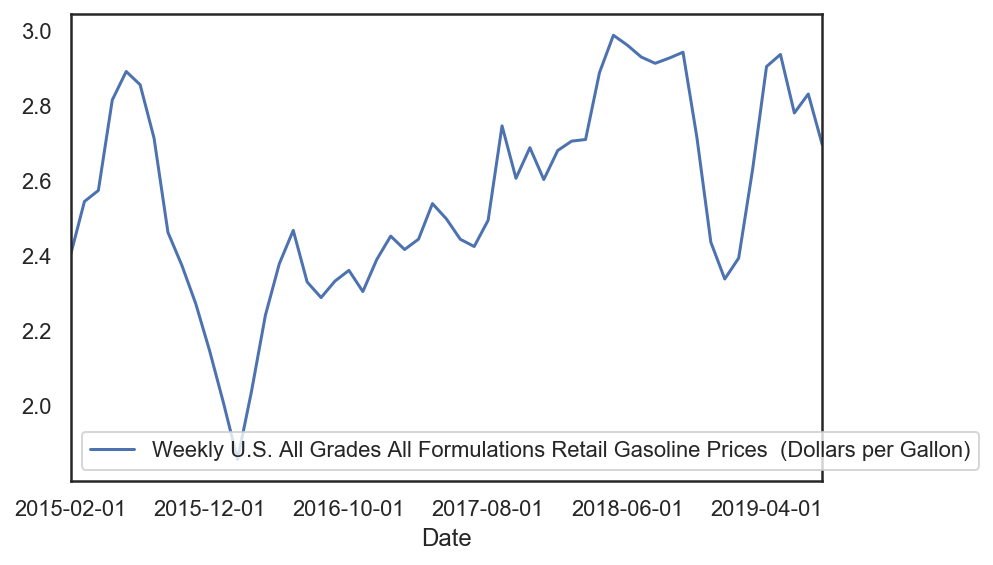

In [31]:
#plot the data .
sns.set(style="white")
df1.plot()

In [71]:
# split the data into train and test , Set four month for testing
train = df1.iloc[:-12]
test = df1.iloc[len(df1)-12:]

In [72]:
# define start and end of prediction
start = len(train)
end = len(train) + len(test) - 1

In [34]:
# grid search to find optimal parameters
stepwise_model = auto_arima(train,
                           m=24,
                            seasonal=True,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 24); AIC=10.990, BIC=14.512, Fit time=0.023 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 24); AIC=-56.942, BIC=-49.897, Fit time=0.503 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 24); AIC=-58.531, BIC=-53.248, Fit time=0.035 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 24); AIC=-62.607, BIC=-55.562, Fit time=0.107 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 24); AIC=-61.307, BIC=-52.501, Fit time=0.339 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 24); AIC=-59.644, BIC=-49.077, Fit t

In [35]:
# use optimal parameters found
md= sm.tsa.statespace.SARIMAX(train,
                                order=(0, 0, 0),
                            seasonal_order=(0, 0, 0, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

In [36]:
# make prediction
predictions = md.predict(start=start , end=end ,dynamic=False , typ = 'levels').rename('SARIMA(0, 0, 0)(0, 0, 0, 24) Predictions')

In [37]:
# change index to date time object
test.index = pd.to_datetime(test.index)

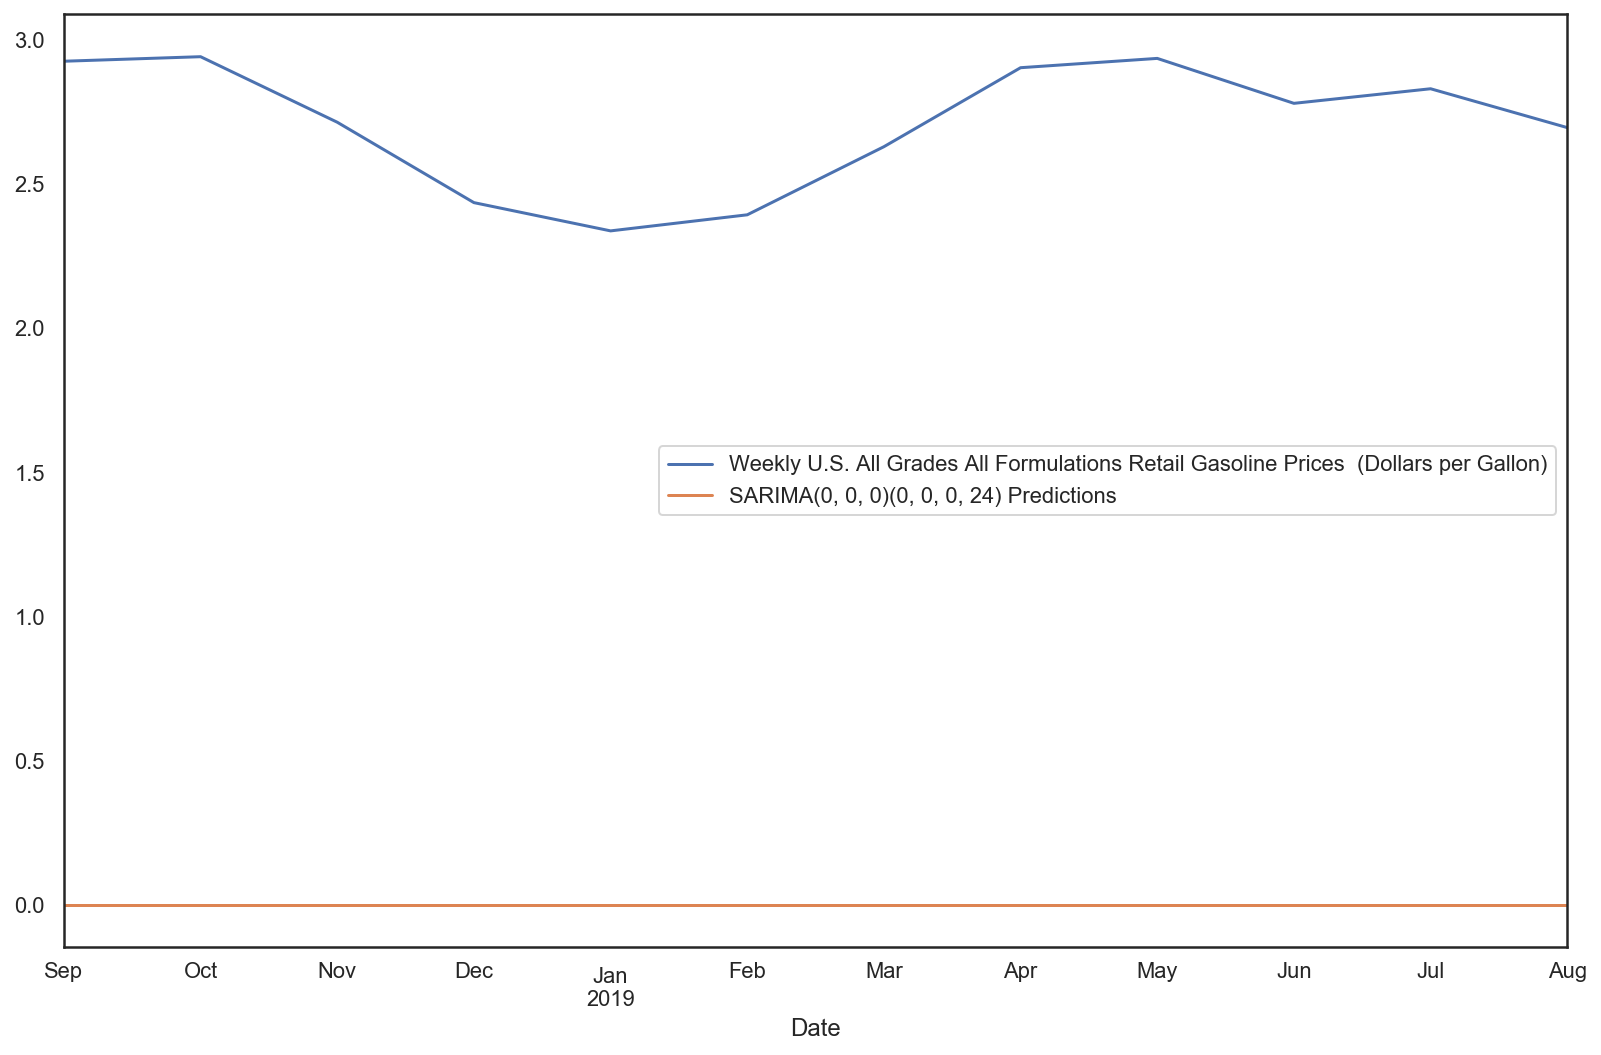

In [38]:
# plot predict vs test
test.plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)

## add multi variables :

In [137]:
# take the data  from 2015 -2019
d=df[df.index > '2015-01-01']
d.head()

,Weekly U.S. Ending Stocks of Finished Motor Gasoline (Thousand Barrels),U.S. Gasoline Demand (Thousand Barrels per Day),Weekly U.S. Imports of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Exports of Finished Motor Gasoline (Thousand Barrels per Day),Motor Gasoline Consumed by the Transportation Sector(T/ B per Day),Motor Gasoline Consumed by the Commercial Sector(T/ B per Day),Motor Gasoline Consumed by the Industrial Sector(T/ B per Day),Rigs Count
Date,,,,,,,,,,,
2015-02-01,29658,8659,24,2.401250,8659.000000,9435,588,8498.257,195.922,134.381,1050
2015-03-01,29155,8957,14,2.544000,8957.250000,9576,612,8717.704,200.981,137.851,857
2015-04-01,26561,9006,60,2.573333,9006.333333,9835,546,8845.658,203.931,139.874,750
2015-05-01,25476,9191,48,2.814400,9191.800000,9800,498,8915.920,205.551,140.985,662
2015-06-01,25969,9540,25,2.890250,9540.500000,9842,396,9064.745,208.982,143.339,634


In [138]:
 features_drop = ['Weekly U.S. Ending Stocks of Total Gasoline  (Thousand Barrels)',
                 'U.S. Production of Gasoline (Thousand Barrels per Day)',
                 'Weekly U.S. Imports of Total Gasoline  (Thousand Barrels per Day)',
                 'Weekly U.S. Imports of Finished Motor Gasoline  (Thousand Barrels per Day)',
                 'Weekly U.S. Days of Supply of Total Gasoline  (Number of Days)',
                 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
                  'Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)',
                  'Motor Gasoline Consumed by the Commercial Sector(T/ B per Day)',
                 'Motor Gasoline Consumed by the Industrial Sector(T/ B per Day)',
                ]

In [139]:
# grab the selected features
selected_features = [x for x in d.columns if x not in features_drop]
selected_features

['Weekly U.S. Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
 'U.S. Gasoline Demand (Thousand Barrels per Day)',
 'Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)',
 'Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)',
 'Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)',
 'Rigs Count']

In [140]:
# separate the selected_column in X_train and price in y_train
exog= d[selected_features]
exog.head()

,Weekly U.S. Ending Stocks of Finished Motor Gasoline (Thousand Barrels),U.S. Gasoline Demand (Thousand Barrels per Day),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Exports of Finished Motor Gasoline (Thousand Barrels per Day),Rigs Count
Date,,,,,,
2015-02-01,29658,8659,8659.000000,9435,588,1050
2015-03-01,29155,8957,8957.250000,9576,612,857
2015-04-01,26561,9006,9006.333333,9835,546,750
2015-05-01,25476,9191,9191.800000,9800,498,662
2015-06-01,25969,9540,9540.500000,9842,396,634


In [163]:
# split train and test for exogenous variables
exog_to_train = exog.iloc[:-12]
exog_to_test = exog.iloc[len(exog)-12:]

In [164]:
# split the data into train and test , Set four month for testing
train = df1.iloc[:-12]
test = df1.iloc[len(df1)-12:]

In [381]:
# use optimal parameters found *(5, 4, 6),(6, 0, 7),(6, 3 ,6),(7, 1, 8),(7, 3, 7) ,(7, 4, 4),(7, 7, 2) (8, 1, 8) 
mod= sm.tsa.statespace.SARIMAX(train,
                                order=(8, 4, 4) ,
                               exogenous=exog_to_train,
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

In [382]:
# make prediction
prediction = mod.predict(start=start , end=end ,dynamic=False , typ = 'levels', exogenous=exog_to_test ).rename('SARIMA Predictions')

In [383]:
# change index to date time object
test.index = pd.to_datetime(test.index)

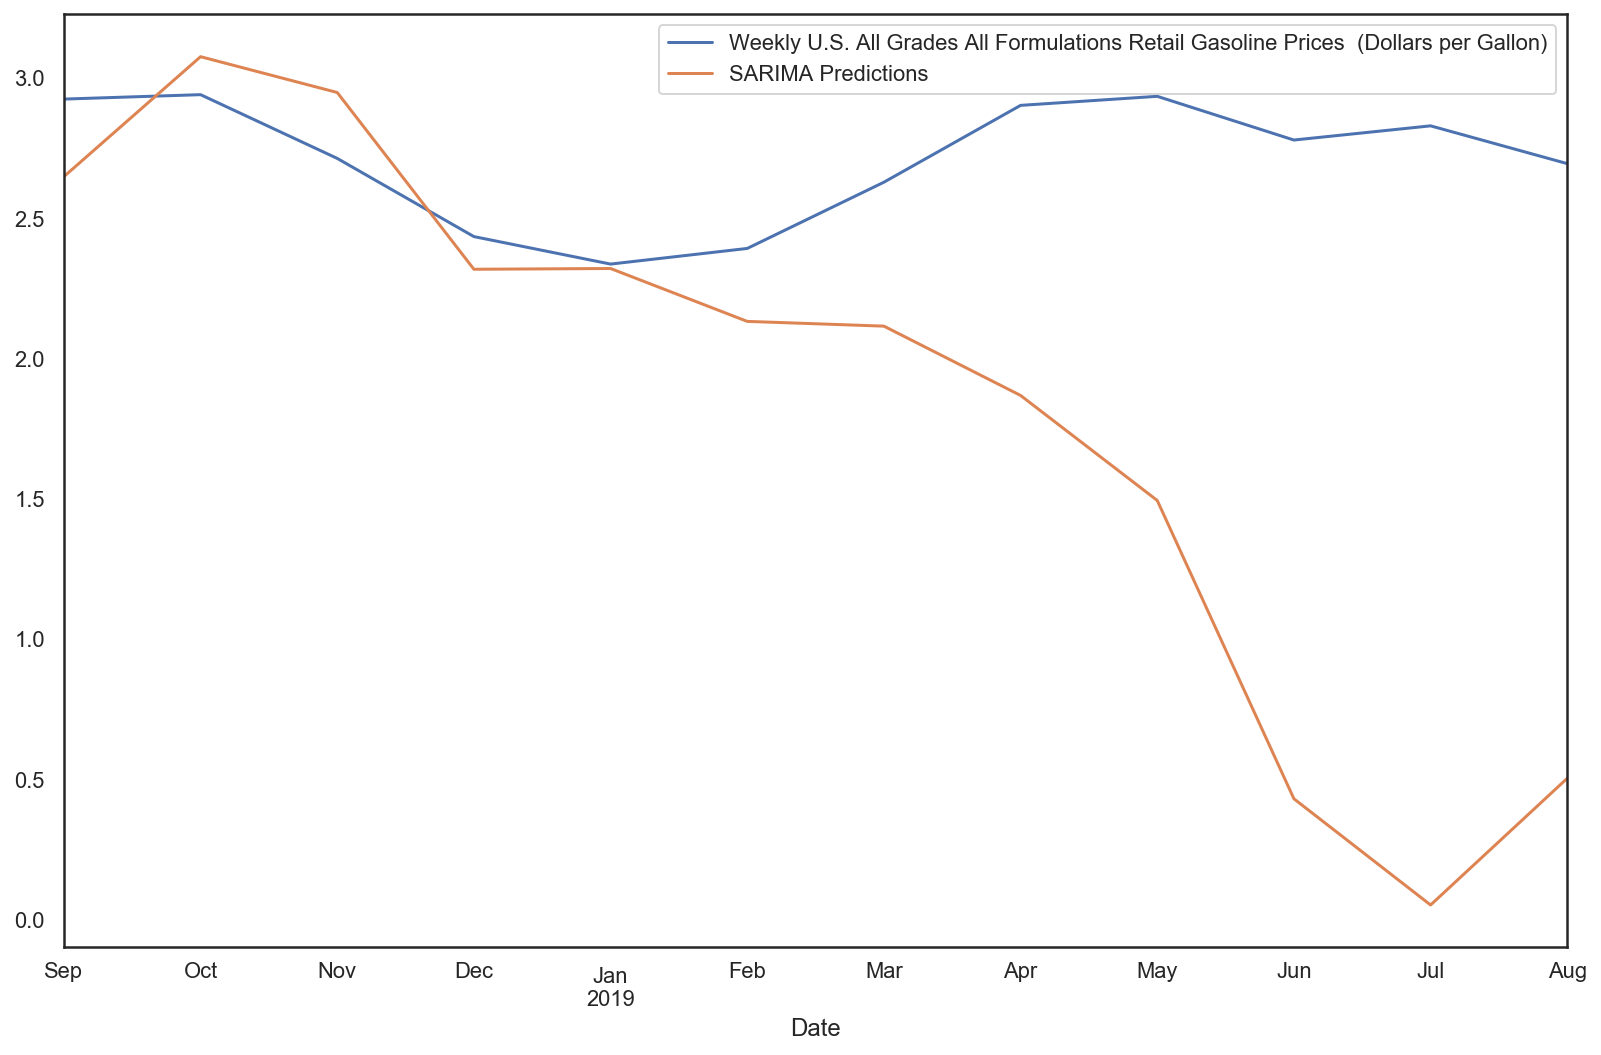

In [384]:
# plot predict vs test
test.plot(legend=True, figsize=(12,8))
prediction.plot(legend=True)

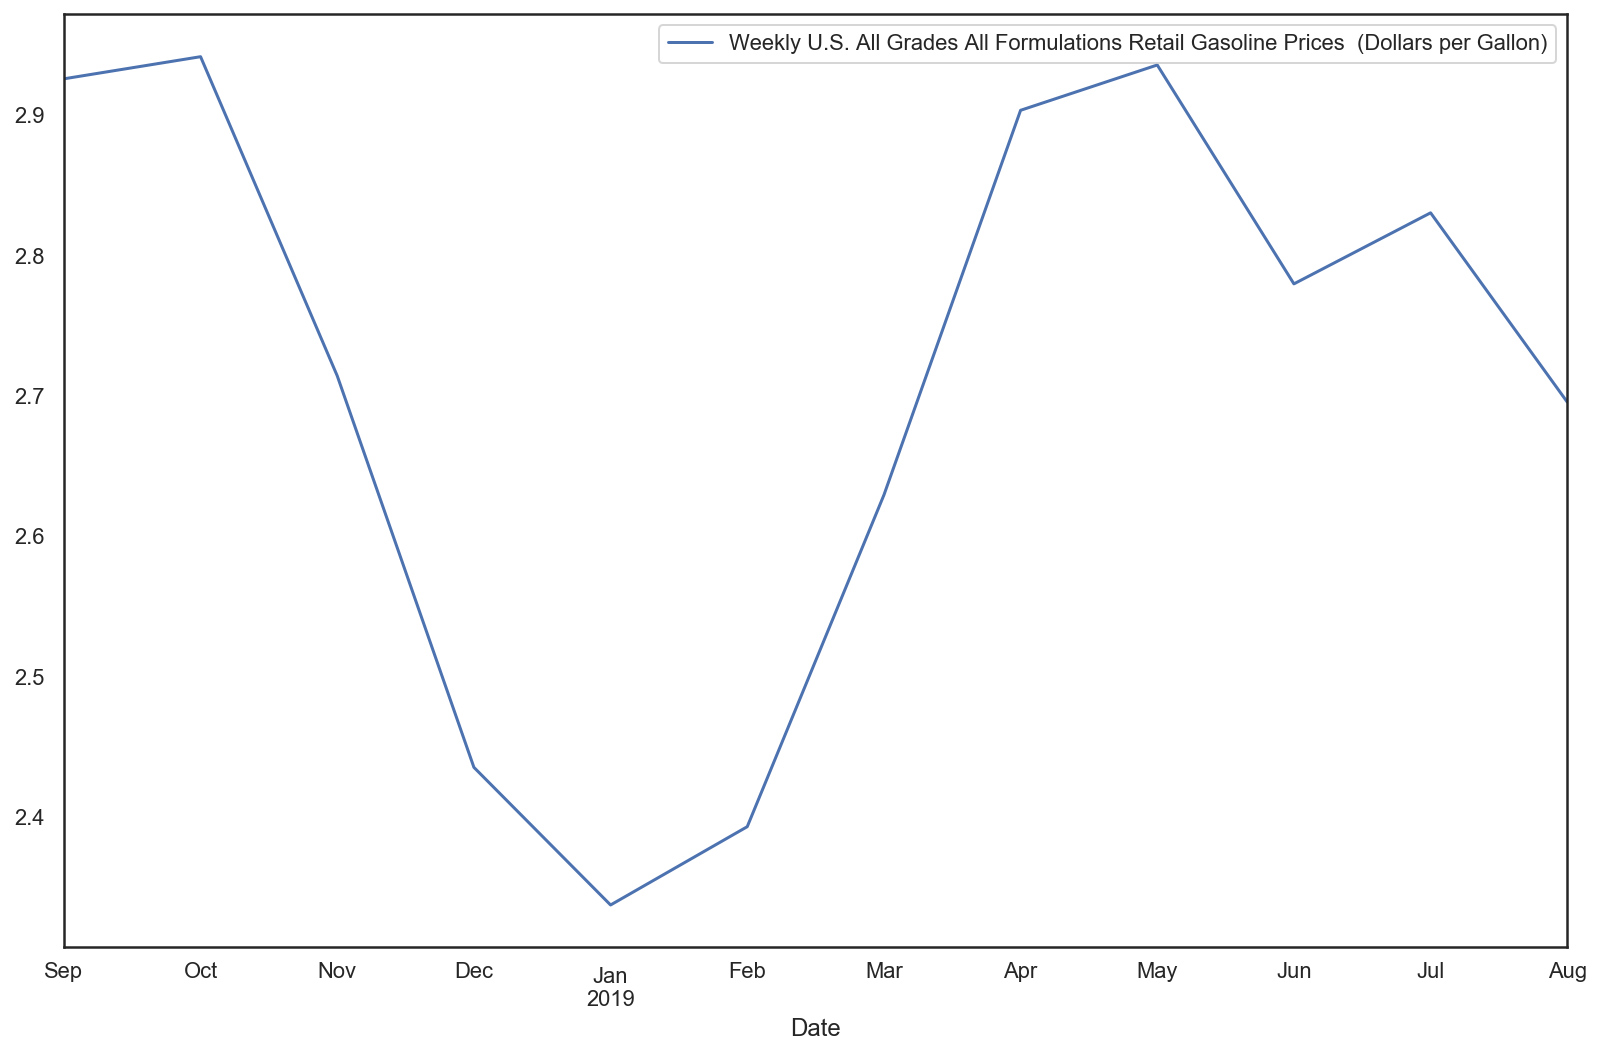

In [173]:
test.plot(legend=True, figsize=(12,8))


In [371]:
# check the r2_score(8,1,8)
r2_score(test,prediction)

-0.4398062940166121

In [386]:
#

In [83]:
# but the rang from 0-9
import itertools
p=d=q=range(0,9)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [87]:
# make for loop to present  the best pdq..and the best is (7, 2, 2) which is our guess number .
for param in pdq:
    try:
        model_sarima = sm.tsa.statespace.SARIMAX(train,order=param,exog=exog_to_train)
        model_sarima_fit = model_sarima.fit()
        print(param,model_sarima_fit.aic)
    except:
        continue

(0, 0, 0) 101.38362801935585
(0, 0, 1) -26.64099783252923
(0, 0, 2) -29.315564893700902
(0, 0, 3) -27.16564731395082
(0, 0, 4) -25.669627580648374
(0, 0, 5) -18.41787036434833
(0, 0, 6) -2.384901497117177
(0, 0, 7) 13.189142174734942
(0, 0, 8) 34.41299625115589
(0, 1, 0) 54.561747278716275
(0, 1, 1) -63.760267496821015
(0, 1, 2) -62.165827855763794
(0, 1, 3) -61.06452448995351
(0, 1, 4) -54.43223836905483
(0, 1, 5) -50.47731938835064
(0, 1, 6) -31.130946962823856
(0, 1, 7) 14.37103504976215
(0, 1, 8) 21.696605930170563
(0, 2, 0) 62.527340279437794
(0, 2, 1) -54.105822126725286
(0, 2, 2) -55.396954586938236
(0, 2, 3) -52.427202419926914
(0, 2, 4) -52.583911401175115
(0, 2, 5) -44.717592116931556
(0, 2, 6) -4.016211713008218
(0, 2, 7) 12.229249774769631
(0, 2, 8) 248.99397671333165
(0, 3, 0) 98.42499188946084
(0, 3, 1) -36.93285246454519
(0, 3, 2) 6.417966418990099
(0, 3, 3) -38.245459526638854
(0, 3, 4) 43.69799031448815
(0, 3, 5) 34.724041744522324
(0, 3, 6) 90.84727184340989
(0, 3, 7)

(3, 4, 6) 262.0257127919291
(3, 4, 7) 195.07552849797167
(3, 4, 8) 245.10966134167134
(3, 5, 0) 38.14494960643509
(3, 5, 1) 33.58143706015794
(3, 5, 2) 36.93272748635827
(3, 5, 3) 66.4677836351118
(3, 5, 4) 90.44234151558737
(3, 5, 5) 79.69817037877282
(3, 5, 6) 144.35524546638854
(3, 5, 7) 102.81529025108868
(3, 5, 8) 515.6169411241633
(3, 6, 0) 70.8749126078753
(3, 6, 1) 67.92663217575668
(3, 6, 2) 88.43142226185387
(3, 6, 3) 49.790487273392955
(3, 6, 4) 116.02253911881874
(3, 6, 5) 123.9844267135321
(3, 6, 6) 93.00913871624473
(3, 6, 7) 91.79699754869796
(3, 6, 8) 493.619134171475
(3, 7, 0) 96.13989915272623
(3, 7, 1) 97.8738150414006
(3, 7, 2) 126.69470666020251
(3, 7, 3) 80.20511613004845
(3, 7, 4) 129.1902137105734
(3, 7, 5) 128.5098366760476
(3, 7, 6) 109.67521025247433
(3, 7, 7) 262.3362861383125
(3, 7, 8) 9768.340127579026
(3, 8, 0) 126.95630454377373
(3, 8, 1) 128.1032771893993
(3, 8, 2) 147.70718185988142
(3, 8, 3) 110.18125557813663
(3, 8, 4) 147.82627174246193
(3, 8, 5) 14

(7, 1, 6) 9.525047465011706
(7, 1, 7) 50.64619773940154
(7, 1, 8) 278.57913961081863
(7, 2, 0) -48.598418069561575
(7, 2, 1) -46.26226756415949
(7, 2, 2) -45.30890574249486
(7, 2, 3) -20.974881739918274
(7, 2, 4) -11.059567695181478
(7, 2, 5) 15.032850347198043
(7, 2, 6) 39.99155557428709
(7, 2, 7) 76.27731594339052
(7, 2, 8) 1970.618915056309
(7, 3, 0) -34.973395390896464
(7, 3, 1) -22.04665175702082
(7, 3, 2) -3.9321977102078023
(7, 3, 3) 2.4976717858838278
(7, 3, 4) 113.69150743596359
(7, 3, 5) 80.47458659495662
(7, 3, 6) 193.77586728407908
(7, 3, 7) 212.70086267560077
(7, 3, 8) 4465.293219214498
(7, 4, 0) -13.535064600448706
(7, 4, 1) 170.62056473366894
(7, 4, 2) 67.02488247414405
(7, 4, 3) 52.49288751904343
(7, 4, 4) 345.9587344926714
(7, 4, 5) 47.190040581312665
(7, 4, 6) 393.000638195811
(7, 4, 7) 1300.6685016918616
(7, 5, 0) 16.62822945060688
(7, 5, 1) 346.22184634153325
(7, 5, 2) 123.66434996237462
(7, 5, 3) 105.6785077344476
(7, 5, 4) 905.4815763748376
(7, 5, 5) 27.3169379453